<h1 style="font-size:300%; background-color:white; color:red; text-align:center; line-height : 60px;">
Taller 1 Inteligencia artificial </h1>

<h1 style="font-size:200%; background-color:white; color:black; text-align:center; line-height : 40px;">
Santiago Andrés Gómez Peña </h1>

<h1 style="font-size:200%; background-color:white; color:black; text-align:center; line-height : 40px;">
Julian Felipe Medina Veira </h1>

<h1 style="font-size:200%; background-color:white; color:black; text-align:center; line-height : 40px;">
Santiago Dleon Sanchez Romero </h1>

<ul style="font-size:170%; line-height : 35px;">

Para el taller se tomaron las siguientes tres imagenes con diferentes condiciones de iluminación:

</ul>

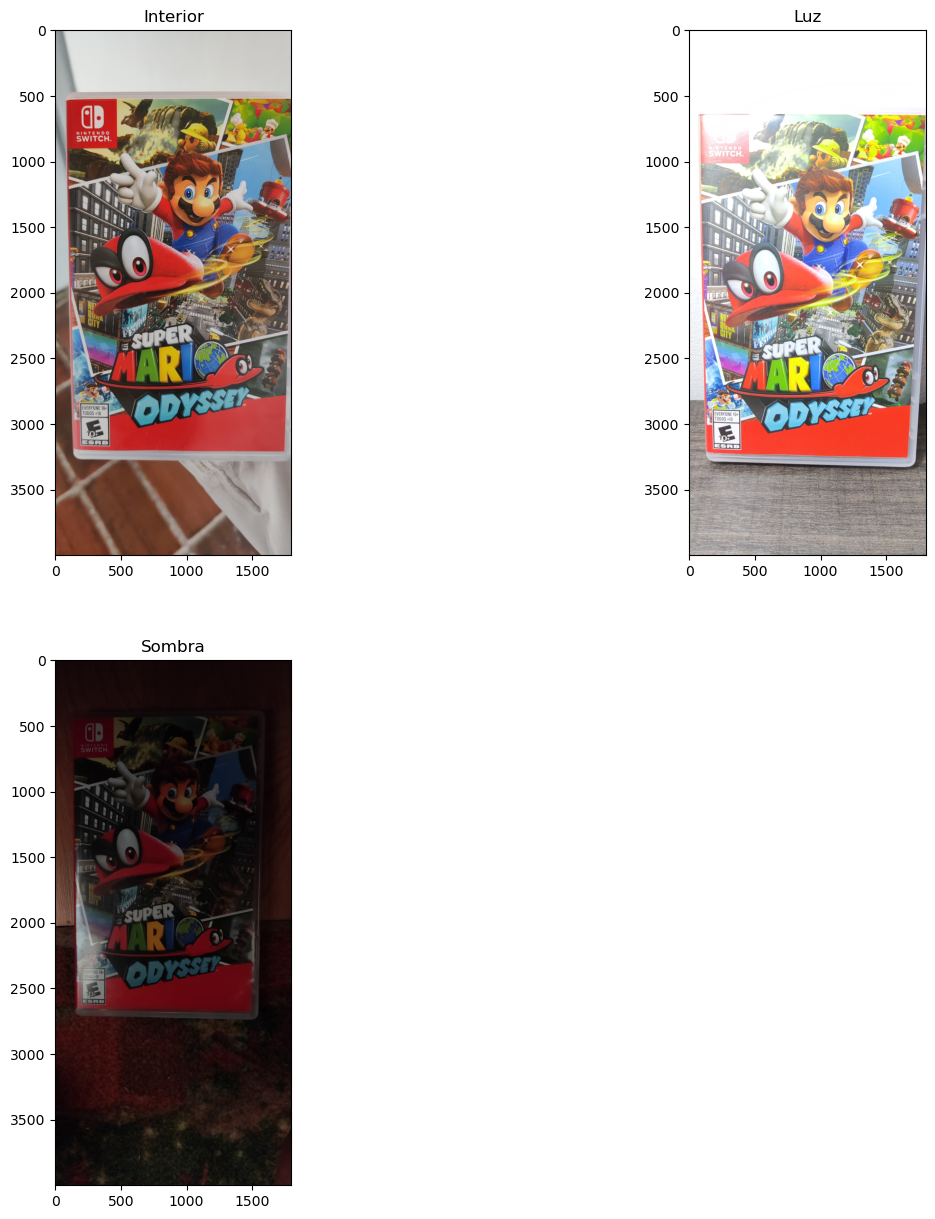

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('Taller1_Normal.jpg',1) #carga la imagen 1 para color
img2 = cv2.imread('Taller1_Luz.jpg',1) 
img3 = cv2.imread('Taller1_Sombra.jpg',1)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #Cambia los canales BGR a RGB
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img1 = cv2.imread('Taller1_Normal.jpg',0) #carga la imagen 0 para grises
img2 = cv2.imread('Taller1_Luz.jpg',0) 
img3 = cv2.imread('Taller1_Sombra.jpg',0)

r1,g1,b1 = cv2.split(img1_rgb) # Guarda los colores de cada imagene en diferentes variables
r2,g2,b2 = cv2.split(img2_rgb)
r3,g3,b3 = cv2.split(img3_rgb)

plt.figure(figsize=(1,15))
plt.subplot(221), plt.imshow(img1_rgb, cmap=plt.cm.gray), plt.title('Interior')
plt.subplot(222), plt.imshow(img2_rgb, cmap=plt.cm.gray), plt.title('Luz')
plt.subplot(223), plt.imshow(img3_rgb, cmap=plt.cm.gray), plt.title('Sombra')

#plt.subplots_adjust(top=0.95, bottom=0.65, left=0.10, right=0.2, hspace=0.1, wspace=0.35) # Ajustar la impresion

plt.show()

<p style="font-size:16px"> El análisis cualitativo preliminar que podemos hacer con estas tres imagenes es el siguiente:
    <ul>
       <li> Imagen en el interior: en esta imagen no se observa una acumulación de tonalidades, es decir, asi como hay tonalidades claras tambien las hay oscuras, pero hay tendencia a una distribucipon "equitativa".
       <li> Imagen con luz: en esta imagen si hay una tendencia de concentración hacia las tonalidades claras, aunque hay tonos oscuros, son en menor número comparados con los tonos claros.
       <li> Imagen con sombra: en esta imagen si hay una tendencia de concentración hacia las tonalidades oscuras, aunque hay tonos claros, son en menor número comparados con los tonos oscuros.</ul>


<ul style="font-size:170%; line-height : 35px;">

Se obtienen los histogramas en color de las imagenes:

</ul>

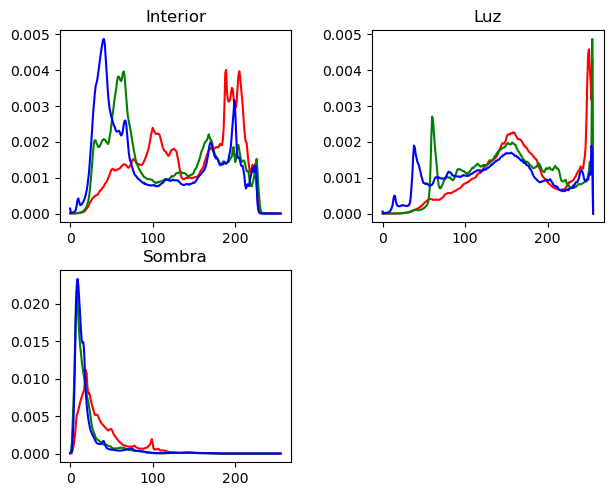

In [60]:
colors = ('r','g','b')
  
# Grafica los tres canales de cada histagrama superponiendolos
for i,color in enumerate(colors):
    hist1_rgb = cv2.calcHist([img1_rgb],[i],None,[256],[0,255])
    plt.subplot(221), plt.plot((hist1_rgb/img1_rgb.size), color = color), plt.title('Interior')
    hist2_rgb = cv2.calcHist([img2_rgb],[i],None,[256],[0,255])
    plt.subplot(222), plt.plot((hist2_rgb/img2_rgb.size), color = color), plt.title('Luz')
    hist3_rgb = cv2.calcHist([img3_rgb],[i],None,[256],[0,255])
    plt.subplot(223), plt.plot((hist3_rgb/img3_rgb.size), color = color), plt.title('Sombra')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35) # Ajustar la impresion    

plt.show()

<p style="font-size:16px"> El análisis de estos primeros histogramas:
    <ul>
       <li> Imagen en el interior: Observando las curvas se puede identificar que todos los canales tienden a tener una distribucion representativa de bits en todas las tonalidades de grises, pero sin embargo, para las tonalidades intermedias, su peso en la distribución, cae a la mitad comparado con el de las tonalidades a los extremos.
       <li> Imagen con luz:. Para esta imagen las curvas de los tres canales tienden a concentrarce en tonalidades mas claras de grises por ende hay un mayor numero de bits con colores claros. Las curvas de los canales tienen una mayor magnitud hacia el lado derecho donde se ubican los valores correspondientes para tonalidades claras.
       <li> Imagen con sombra:Las curvas de los tres canales presentan una evidente concentración hacia la izquierda donde se ubican las tonalidades más oscuras de grises y dado que el peso den la distrubución es muy alto comparado con otras tonalidades, la imagen tiende a estar con colores muy oscuros. Hay poco o nulo peso en la distribución para tonos claros de los tres canales.</ul>

<ul style="font-size:170%; line-height : 35px;">

Se realizan los histogramas en gris de las imagenes para 2, 16 y 256 contenedores:

</ul>

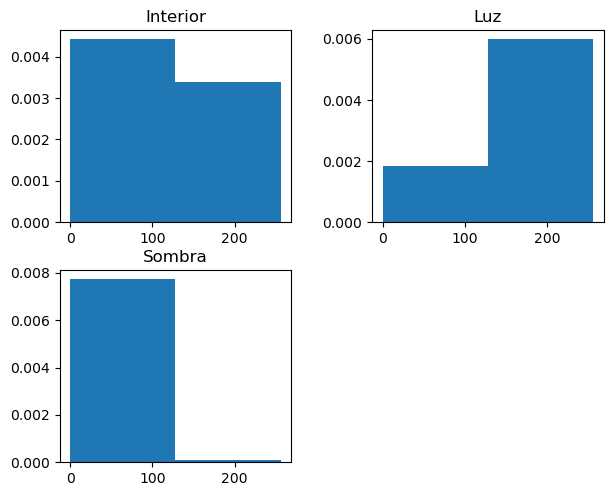

In [76]:
plt.subplot(221), plt.hist(img1[:,:].ravel(),2,[0,256], density = 1), plt.title('Interior')
plt.subplot(222), plt.hist(img2[:,:].ravel(),2,[0,256], density = 1), plt.title('Luz')
plt.subplot(223), plt.hist(img3[:,:].ravel(),2,[0,256], density = 1), plt.title('Sombra')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35) # Ajustar la impresion    

plt.show()

<p style="font-size:16px"> El análisis de histogramas con 2 contenedores:
    <ul>
       <li> Imagen en el interior: Dado que en este histograma solo hay dos tipos de distribución y con coherencia a la primer analisis lo que se puede observar es que hay una tendencia de distribucion entre tonos claros y oscuros de grises, por ello las dos columnas tienen casi la misma magnitud, aunque hay un poco mas de tonos oscuros que de claros.
       <li> Imagen con luz: Como se afirmo en el primer análisis en esta imagen hay una tendencia de que mayor numero de bits tienen tonalidades de grises mas claros en todos sus canales y es de esta forma como se puede ver que la columna de lado derecho tiene una mayor magnitud comparada con la columna de la izquierda, lo cual significa una mayor concretación de bits para tonos claros de los tres canales.
       <li> Imagen con sombra:En esta imagen evidentemente hay una concentración de tonalidades oscuras de gris para la gran mayoria de los bits, por ello se puede observar que practicamente todo el peso de la distribución esta para tonalidades oscuras y tambien la columna de la izquierda tiene casi que toda el area disponible por la distribución.</ul>

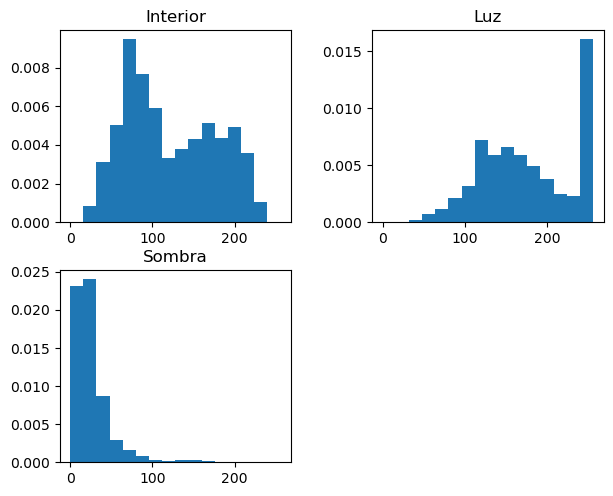

In [77]:
plt.subplot(221), plt.hist(img1[:,:].ravel(),16,[0,256], density = 1), plt.title('Interior')
plt.subplot(222), plt.hist(img2[:,:].ravel(),16,[0,256], density = 1), plt.title('Luz')
plt.subplot(223), plt.hist(img3[:,:].ravel(),16,[0,256], density = 1), plt.title('Sombra')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35) # Ajustar la impresion    

plt.show()

<p style="font-size:16px"> El análisis de histogramas con 16 contenedores:
    <ul>
       <li> Imagen en el interior: Dado que en este histograma hay mas posibilidades de distribución se pued eobservar como las tonalidades intermedias tienden a ocupar pesos iguales entre si en la distribucion pero hay un mayor peso para las tonalidades mas a la izquierda que son las oscuras.
       <li> Imagen con luz: Se puede observar que hay tonalidades intermedias que empiezan a tener un peso en la distribución pero sigue persistiendo una acumulación en las columnas de las derechas que represnetan las tonalidades claras.
       <li> Imagen con sombra:En este histograma aunque tonalidades intermedia se re presnetan con un peso en la distribución la mayor acumulación ocurre en el lado izquierdo donde se encuentran las tonalidades mas oscuras.</ul>
       En general a medida que se utilizan mayor numero de contenedores se ira obteniendo un área de histograma igual al area bajo la curva de los primeros histogramas. Entre mayor contenedores es un numero de posibilidades donde se pueden ubicar los bits segun la tonalidad de grises que contienen.

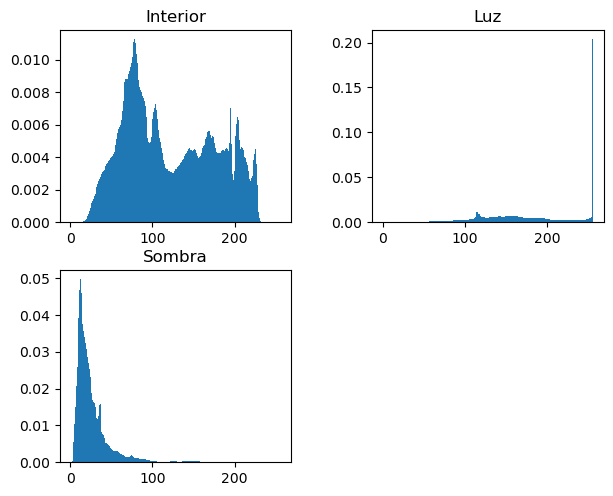

In [78]:
plt.subplot(221), plt.hist(img1[:,:].ravel(),256,[0,256], density = 1), plt.title('Interior')
plt.subplot(222), plt.hist(img2[:,:].ravel(),256,[0,256], density = 1), plt.title('Luz')
plt.subplot(223), plt.hist(img3[:,:].ravel(),256,[0,256], density = 1), plt.title('Sombra')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35) # Ajustar la impresion    

plt.show()

<p style="font-size:16px"> El análisis de histogramas con 256 contenedores:
  En este caso como se enuentrar el mismo numero posibilidades para distribuir los bits que en los primeros histogramas la  representacion que se obtiene es el area bajo la curva de un histograma de lineas que tiene encuenta el numero de bits que esta en una escala de grises determinada. De la misma forma que en los histogramas anteriores se puede identificar la tendencia de acumulación, en el caso del primer histograma que es la imagen al interior se tiene a una distribución  sobre tonalidades intermedias , en la imagen con luz la acumulación es hacia la derecha en tonalidades claras y en la imagen con sombra la acumulacion es hacia la izquierda con tonalidades mas oscuras.

<ul style="font-size:170%; line-height : 35px;">

Se realizan las comparaciones entre la imagen en interior y la imagen con luz

</ul>

In [68]:
h1 = cv2.calcHist([img1],[0],None,[256],[0,256])
h2 = cv2.calcHist([img2],[0],None,[256],[0,256])
h3 = cv2.calcHist([img3],[0],None,[256],[0,256])

cor = cv2.compareHist(h1,h2,0) #Cor
chi = cv2.compareHist(h1,h2,1) #Chi
inter = cv2.compareHist(h1,h2,2) #Intersección 
bhat = cv2.compareHist(h1,h2,3) #Bhat

inter_norm = inter/((img1.size+img2.size)/2)
chi_norm = chi/((img1.size+img2.size)/2)

print(f"Correlación: {cor}")
print(f"Chi-cuadrado no normalizado.: {chi}")
print(f"Chi-cuadrado normalizado.: {chi_norm}")
print(f"Intersección no normalizada: {inter}")
print(f"Intersección normalizada: {inter_norm}")
print(f"Bhattacharyya: {bhat}")

Correlación: -0.06861440249046465
Chi-cuadrado no normalizado.: 1390891240.2335696
Chi-cuadrado normalizado.: 193.1793389213291
Intersección no normalizada: 4048548.0
Intersección normalizada: 0.5622983333333333
Bhattacharyya: 0.48525574893337825


<p style="font-size:16px"> De los valores obtenidos podemos observar que la correlación, intersección y bhattacharyya tienden a valores intermedios en su rango, por lo que se puede concluir que existen pocas coincidencias entre las imagenes, las cuales corresponden a la zona central del histograma donde se encuentra el mayor numero de bits que comparten valores 

<ul style="font-size:170%; line-height : 35px;">

Se realizan las comparaciones entre la imagen en interior y la imagen con sombra

</ul>

In [69]:
cor = cv2.compareHist(h1,h3,0) #Cor
chi = cv2.compareHist(h1,h3,1) #Chi
inter = cv2.compareHist(h1,h3,2) #Intersección 
bhat = cv2.compareHist(h1,h3,3) #Bhat

inter_norm = inter/((img1.size+img3.size)/2)
chi_norm = chi/((img1.size+img3.size)/2)

print(f"Correlación: {cor}")
print(f"Chi-cuadrado no normalizado.: {chi}")
print(f"Chi-cuadrado normalizado.: {chi_norm}")
print(f"Intersección no normalizada: {inter}")
print(f"Intersección normalizada: {inter_norm}")
print(f"Bhattacharyya: {bhat}")

Correlación: -0.41252231526327227
Chi-cuadrado no normalizado.: 13944371310.13363
Chi-cuadrado normalizado.: 1936.7182375185598
Intersección no normalizada: 1217268.0
Intersección normalizada: 0.169065
Bhattacharyya: 0.7776186518834821


<p style="font-size:16px"> Se observa que la correlación es negativa, la intersección es baja y bhattacharyya es alta, lo que indica que existen pocos bits en comun entre la imagen en interior y la imagen con sombra, ademas, se puede comprobar la relación que tiene comparada con los datos de la comparación anterior al obtener un peor desempeño, especialmente con chi cuadrado que es 10 veces mayor que en el caso anterior.

<ul style="font-size:170%; line-height : 35px;">

Se realizan las comparaciones entre la imagen con luz y la imagen con sombra

</ul>

In [72]:
cor = cv2.compareHist(h2,h3,0) #Cor
chi = cv2.compareHist(h2,h3,1) #Chi
inter = cv2.compareHist(h2,h3,2) #Intersección 
bhat = cv2.compareHist(h2,h3,3) #Bhat

inter_norm = inter/((img2.size+img3.size)/2)
chi_norm = chi/((img2.size+img3.size)/2)

print(f"Correlación: {cor}")
print(f"Chi-cuadrado no normalizado.: {chi}")
print(f"Chi-cuadrado normalizado.: {chi_norm}")
print(f"Intersección no normalizada: {inter}")
print(f"Intersección normalizada: {inter_norm}")
print(f"Bhattacharyya: {bhat}")

Correlación: -0.1226784649397264
Chi-cuadrado no normalizado.: 365197897828.6488
Chi-cuadrado normalizado.: 50721.930253979
Intersección no normalizada: 491199.0
Intersección normalizada: 0.06822208333333334
Bhattacharyya: 0.8986861889569859


<p style="font-size:16px"> Se observa que el valor de chi cuadrado, intersección y bhattacharyya es el peor de las tres comparaciones, lo que indica la mayor divergencia entre los bits de una y otra imagen, lo cual es debido a que el histograma de la imagen con luz esta principalmente en la zona de la derecha mientras que la imagen con sombra se encuentra agrupada a la izquierda, aun asi, resulta interesante que la correlación es mayor que en el caso anterior, lo cual se debe a que buena parte de los valores en ambos histogramas en un rango pequeño, por lo que la varianza para cada histograma y la covarianza resulta pequeña.

<p style="text-align: justify;"><strong>Conclusiones:&nbsp;</strong></p>
<ul>
    <li style="text-align: justify;">Se puede evidenciar la tendencia de la distribuci&oacute;n de los histogramas, en la imagen con sombra, la tendencia es a agruparse a la izquierda del histograma, sucede lo mismo con la imagen m&aacute;s iluminada pero presentando el comportamiento opuesto agrup&aacute;ndose a la izquierda del histograma.</li>
    <li style="text-align: justify;">Se puede evidenciar como cambiando el bin de menor a mayor, se evidencia que a mayor bins, mayor resoluci&oacute;n para representar la distribuci&oacute;n de los p&iacute;xeles en el histograma, y con muy pocos bins se puede representar informaci&oacute;n sesgada y que no es acertada, es por esto que se recomienda tener en cuenta para futuras oportunidades.</li>
    <li style="text-align: justify;">Se evidencia una mayor correlaci&oacute;n entre la imagen interior y la imagen en sombra, este dato es el esperado pues a simple vista se aprecia que las im&aacute;genes son m&aacute;s cercanas que las otras parejas posibles.</li>
</ul>